In [1]:
# IMPORTS :

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# DATABASE :

data = pd.read_csv('DATABASE.txt', sep=";", header=None, na_values=['?'])

data = data[:5000]

C:\Users\bapti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

0         1                    2                      3        4  \
0        Date      Time  Global_active_power  Global_reactive_power  Voltage   
1  16/12/2006  17:24:00                4.216                  0.418  234.840   
2  16/12/2006  17:25:00                5.360                  0.436  233.630   
3  16/12/2006  17:26:00                5.374                  0.498  233.290   
4  16/12/2006  17:27:00                5.388                  0.502  233.740   

                  5               6               7               8  
0  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
1            18.400           0.000           1.000          17.000  
2            23.000           0.000           1.000          16.000  
3            23.000           0.000           2.000          17.000  
4            23.000           0.000           1.000          17.000

In [4]:
data = data.rename(columns=data.iloc[0]).drop(data.index[0])

data.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
1  16/12/2006  17:24:00               4.216                 0.418  234.840   
2  16/12/2006  17:25:00               5.360                 0.436  233.630   
3  16/12/2006  17:26:00               5.374                 0.498  233.290   
4  16/12/2006  17:27:00               5.388                 0.502  233.740   
5  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  
1           18.400          0.000          1.000         17.000  
2           23.000          0.000          1.000         16.000  
3           23.000          0.000          2.000         17.000  
4           23.000          0.000          1.000         17.000  
5           15.800          0.000          1.000         17.000

In [5]:
#fig1 = data.plot(x ='Date', y='Global_active_power', kind = 'line')

data["Time_index2"] = data["Date"] + " " + data["Time"]

data["Time_index"] = pd.to_datetime(data['Time_index2'], format='%d/%m/%Y %H:%M:%S')
data.set_index(['Time_index'],inplace=True)


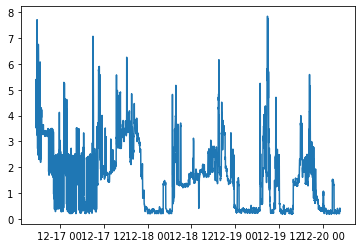

In [6]:
data["Global_active_power"] = data["Global_active_power"].astype(float)
plt.plot(data.index, data.Global_active_power)

In [7]:
# Prophet :

#data = data.rename(columns={"Global_active_power": "y"})
data["ds"] = data.index
data.rename(columns={'Global_active_power': 'y'}, inplace=True)
data

Date      Time      y Global_reactive_power  \
Time_index                                                               
2006-12-16 17:24:00  16/12/2006  17:24:00  4.216                 0.418   
2006-12-16 17:25:00  16/12/2006  17:25:00  5.360                 0.436   
2006-12-16 17:26:00  16/12/2006  17:26:00  5.374                 0.498   
2006-12-16 17:27:00  16/12/2006  17:27:00  5.388                 0.502   
2006-12-16 17:28:00  16/12/2006  17:28:00  3.666                 0.528   
...                         ...       ...    ...                   ...   
2006-12-20 04:38:00  20/12/2006  04:38:00  0.398                 0.254   
2006-12-20 04:39:00  20/12/2006  04:39:00  0.414                 0.258   
2006-12-20 04:40:00  20/12/2006  04:40:00  0.392                 0.250   
2006-12-20 04:41:00  20/12/2006  04:41:00  0.388                 0.248   
2006-12-20 04:42:00  20/12/2006  04:42:00  0.310                 0.144   

                     Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
Time_index                                                                    
2006-12-16 17:24:00  234.840           18.400          0.000          1.000   
2006-12-16 17:25:00  233.630           23.000          0.000          1.000   
2006-12-16 17:26:00  233.290           23.000          0.000          2.000   
2006-12-16 17:27:00  233.740           23.000          0.000          1.000   
2006-12-16 17:28:00  235.680           15.800          0.000          1.000   
...                      ...              ...            ...            ...   
2006-12-20 04:38:00  247.160            1.800          0.000          0.000   
2006-12-20 04:39:00  246.660            2.000          0.000          0.000   
2006-12-20 04:40:00  246.060            1.800          0.000          0.000   
2006-12-20 04:41:00  246.520            1.800          0.000          1.000   
2006-12-20 04:42:00  247.000            1.400          0.000          0.000   

                    Sub_metering_3          Time_index2                  ds  
Time_index                                                                   
2006-12-16 17:24:00         17.000  16/12/2006 17:24:00 2006-12-16 17:24:00  
2006-12-16 17:25:00         16.000  16/12/2006 17:25:00 2006-12-16 17:25:00  
2006-12-16 17:26:00         17.000  16/12/2006 17:26:00 2006-12-16 17:26:00  
2006-12-16 17:27:00         17.000  16/12/2006 17:27:00 2006-12-16 17:27:00  
2006-12-16 17:28:00         17.000  16/12/2006 17:28:00 2006-12-16 17:28:00  
...                            ...                  ...                 ...  
2006-12-20 04:38:00          0.000  20/12/2006 04:38:00 2006-12-20 04:38:00  
2006-12-20 04:39:00          0.000  20/12/2006 04:39:00 2006-12-20 04:39:00  
2006-12-20 04:40:00          0.000  20/12/2006 04:40:00 2006-12-20 04:40:00  
2006-12-20 04:41:00          0.000  20/12/2006 04:41:00 2006-12-20 04:41:00  
2006-12-20 04:42:00          0.000  20/12/2006 04:42:00 2006-12-20 04:42:00  

[4999 rows x 11 columns]

In [8]:
m = Prophet()
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=1500, freq='min')
future.tail()

ds
6494 2006-12-21 05:38:00
6495 2006-12-21 05:39:00
6496 2006-12-21 05:40:00
6497 2006-12-21 05:41:00
6498 2006-12-21 05:42:00

In [10]:
# Forecast :

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
6494 2006-12-21 05:38:00  0.067290   -1.291411    1.367123
6495 2006-12-21 05:39:00  0.071335   -1.306511    1.514640
6496 2006-12-21 05:40:00  0.075467   -1.248245    1.420365
6497 2006-12-21 05:41:00  0.079687   -1.359777    1.549980
6498 2006-12-21 05:42:00  0.083995   -1.211500    1.413565

In [11]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0    2006-12-16 17:24:00  2.609179    2.245619    4.504458     2.609179   
1    2006-12-16 17:25:00  2.609064    2.220826    4.695277     2.609064   
2    2006-12-16 17:26:00  2.608948    2.260302    4.643840     2.608948   
3    2006-12-16 17:27:00  2.608832    2.229542    4.548633     2.608832   
4    2006-12-16 17:28:00  2.608716    2.396091    4.625314     2.608716   
...                  ...       ...         ...         ...          ...   
6494 2006-12-21 05:38:00  0.894195   -1.291411    1.367123     0.201427   
6495 2006-12-21 05:39:00  0.894096   -1.306511    1.514640     0.200721   
6496 2006-12-21 05:40:00  0.893997   -1.248245    1.420365     0.200014   
6497 2006-12-21 05:41:00  0.893898   -1.359777    1.549980     0.199308   
6498 2006-12-21 05:42:00  0.893799   -1.211500    1.413565     0.198602   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        2.609179        0.824805              0.824805              0.824805   
1        2.609064        0.830707              0.830707              0.830707   
2        2.608948        0.836592              0.836592              0.836592   
3        2.608832        0.842462              0.842462              0.842462   
4        2.608716        0.848315              0.848315              0.848315   
...           ...             ...                   ...                   ...   
6494     1.638355       -0.826905             -0.826905             -0.826905   
6495     1.639209       -0.822761             -0.822761             -0.822761   
6496     1.640169       -0.818530             -0.818530             -0.818530   
6497     1.640622       -0.814211             -0.814211             -0.814211   
6498     1.641076       -0.809804             -0.809804             -0.809804   

         daily  daily_lower  daily_upper  multiplicative_terms  \
0     0.824805     0.824805     0.824805                   0.0   
1     0.830707     0.830707     0.830707                   0.0   
2     0.836592     0.836592     0.836592                   0.0   
3     0.842462     0.842462     0.842462                   0.0   
4     0.848315     0.848315     0.848315                   0.0   
...        ...          ...          ...                   ...   
6494 -0.826905    -0.826905    -0.826905                   0.0   
6495 -0.822761    -0.822761    -0.822761                   0.0   
6496 -0.818530    -0.818530    -0.818530                   0.0   
6497 -0.814211    -0.814211    -0.814211                   0.0   
6498 -0.809804    -0.809804    -0.809804                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                            0.0                         0.0  3.433985  
1                            0.0                         0.0  3.439770  
2                            0.0                         0.0  3.445540  
3                            0.0                         0.0  3.451294  
4                            0.0                         0.0  3.457031  
...                          ...                         ...       ...  
6494                         0.0                         0.0  0.067290  
6495                         0.0                         0.0  0.071335  
6496                         0.0                         0.0  0.075467  
6497                         0.0                         0.0  0.079687  
6498                         0.0                         0.0  0.083995  

[6499 rows x 16 columns]

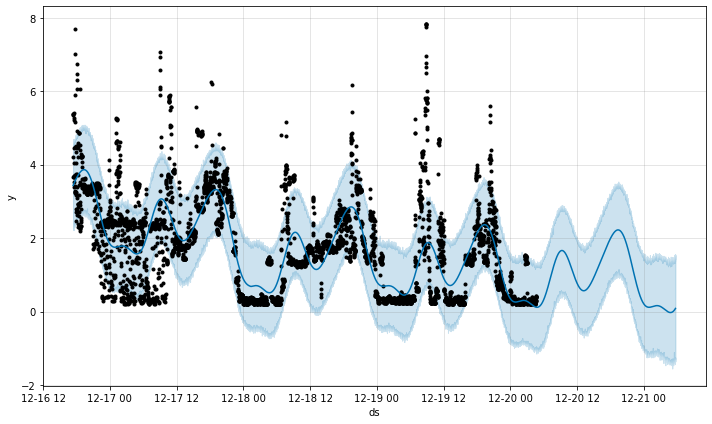

In [12]:
# Visualisation Forecast :

fig2 = m.plot(forecast)

In [13]:
# COM :

#plt.plot(forecast.ds, forecast.trend)
#fig2 = m.plot_components(forecast)

In [14]:
# Interactive Visualisation :

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

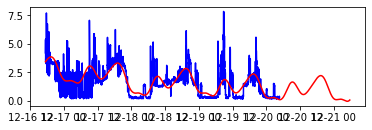

In [15]:
"""
df1 = pd.DataFrame()
df1['ds'] = data['ds']
df1['y'] = data['y']
df1

df2 = pd.DataFrame()
df2['ds'] = forecast['ds']
df2['y'] = forecast['yhat']
df2['ds'] = pd.to_datetime(df2['ds'], format='%Y-%m-%d %H:%M:%S')
df2

frames = [df1, df2]

df = pd.concat(frames)


df.set_index(['ds'],inplace=True)


df["y"] = df["y"].astype(float)

plt.subplot(2, 1, 1)
plt.plot(data.index, data.y)
"""


plt.subplot(2, 1, 2)
#plt.plot(df.index, df.y)
plt.plot(data.index, data.y, 'b')
plt.plot(forecast.ds,forecast.yhat, 'r')

plt.show()